1. Import Basic Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [11]:
#Percentage of missing values in the dataset
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage)

age         0.0
sex         0.0
cp          0.0
trestbps    0.0
chol        0.0
fbs         0.0
restecg     0.0
thalach     0.0
exang       0.0
oldpeak     0.0
slope       0.0
ca          0.0
thal        0.0
target      0.0
dtype: float64


In [13]:
continuous_columns = ["age","trestbps","chol","thalach","oldpeak"]
df[continuous_columns].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


In [12]:
over_30 = df[df["age"]>30]
over_30.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


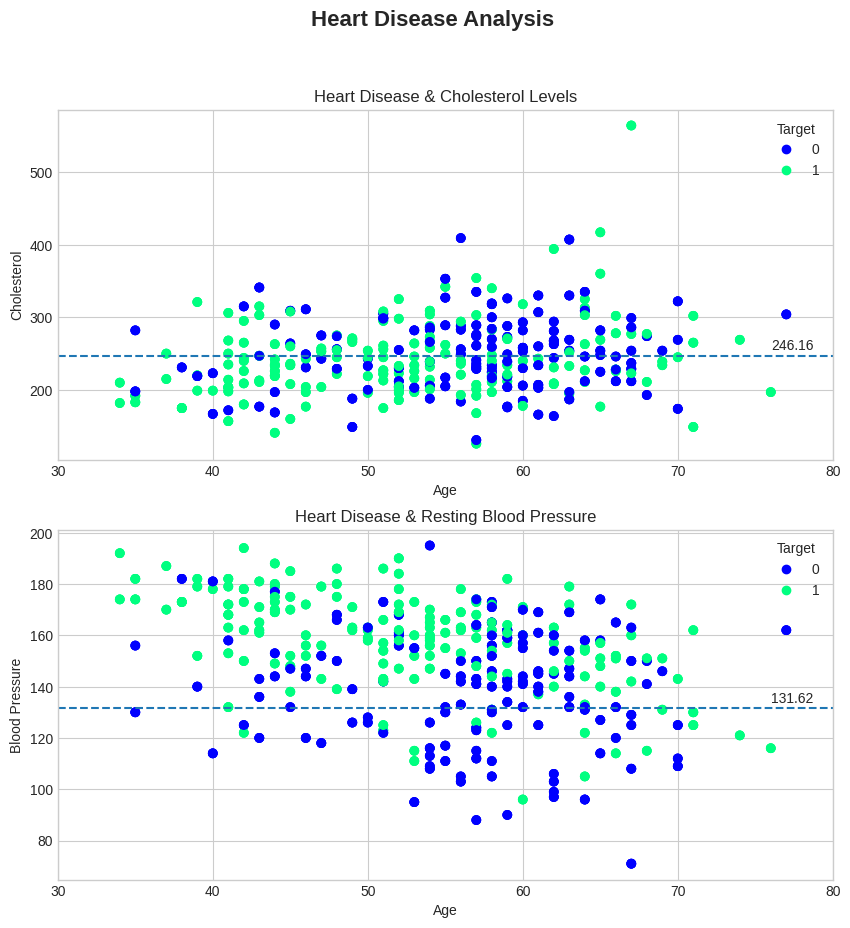

In [14]:
# Set the style
plt.style.use('seaborn-v0_8-whitegrid')

# subplot of chol, age, thalach
fig, (ax0, ax1) = plt.subplots(nrows=2,
                              ncols=1,
                              figsize=(10,10))

# Add data to ax0
scatter = ax0.scatter(x=over_30["age"],
                      y=over_30["chol"],
                      c=over_30["target"],
                      cmap="winter") # change plot (matplotlib.org)

# Customize ax0
ax0.set(title="Heart Disease & Cholesterol Levels",
        xlabel="Age",
        ylabel="Cholesterol")

ax0.set_xlim([30, 80]) # Change x axis limit

# Add a legend to ax0
ax0.legend(*scatter.legend_elements(), title="Target")

# Add a horizontal line
ax0.axhline(y=over_30["chol"].mean(),
            linestyle="--")

ax0.text(76, over_30["chol"].mean()+10, round(over_30["chol"].mean(),2)) # Add mean value to line

# Add data to ax1
scatter = ax1.scatter(x=over_30["age"],
                      y=over_30["thalach"],
                      c=over_30["target"],
                      cmap="winter") # change plot (matplotlib.org)

# Customize ax1
ax1.set(title="Heart Disease & Resting Blood Pressure",
        xlabel="Age",
        ylabel="Blood Pressure")

ax1.set_xlim([30, 80]) # Change x axis limit

# Add a legend to ax1
ax1.legend(*scatter.legend_elements(), title="Target")

# Add a mean line
ax1.axhline(y=over_30["trestbps"].mean(),
            linestyle="--")

ax1.text(76, over_30["trestbps"].mean()+2, round(over_30["trestbps"].mean(),2)) # Add mean value to line

# Add a title to the figure
fig.suptitle("Heart Disease Analysis", fontsize=16, fontweight="bold");